Andres Felipe Herrera Moreno - 1710150

Santiago Rodríguez Penagos - 1670706

In [1]:
conda install pydot

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.utils.multiclass import unique_labels
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO
from time import time

# Remove deprecated warnings
import warnings
warnings.filterwarnings('ignore')

# Import Decision Tree Classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
# Import train_test_split function
from sklearn.model_selection import train_test_split 
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Import Neural Network Classifier
from sklearn.neural_network import MLPClassifier


/home/santiago/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Description of fields:

* age: age in years

* sex: (1 = male; 0 = female)

* cp: chest pain type

* trestbps: resting blood pressure (in mm Hg on admission to the hospital)

* chol: serum cholestoral in mg/dl

* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* restecg: resting electrocardiographic results

* thalach: maximum heart rate achieved

* exang: exercise induced angina (1 = yes; 0 = no)

* oldpeak: ST depression induced by exercise relative to rest

* slope: the slope of the peak exercise ST segment

* ca: number of major vessels (0-3) colored by flourosopy

* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

* target: 1 or 0

Documentation:
    
* precision_score

Compute the precision

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.

* accuracy_score

Accuracy classification score.

In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

* confusion_matrix

Compute confusion matrix to evaluate the accuracy of a classification

In [2]:
# Load training model
trainx=pd.read_csv("./data/heart.csv")

# Show matrix head 
trainx.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Show matrix description
trainx.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


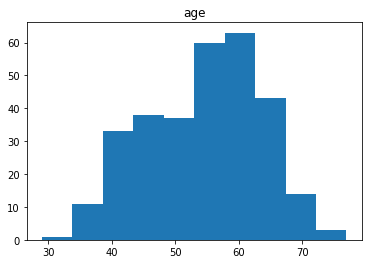

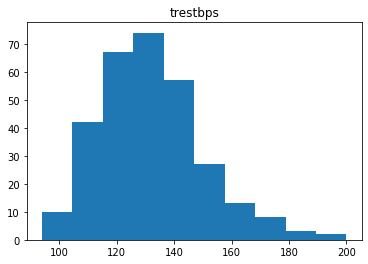

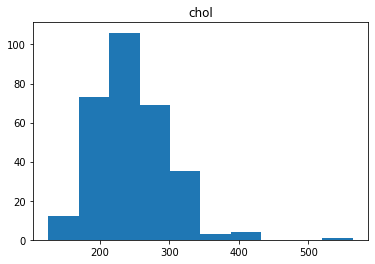

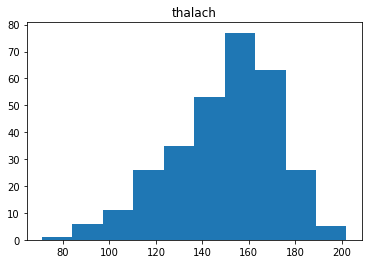

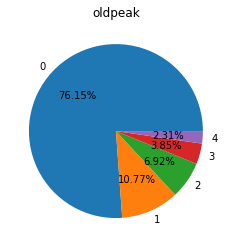

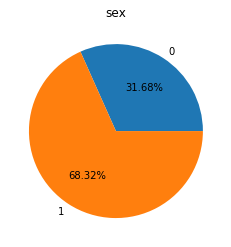

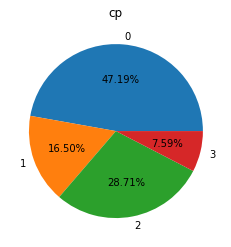

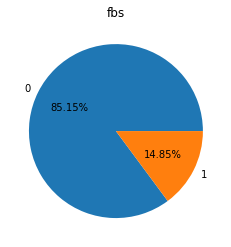

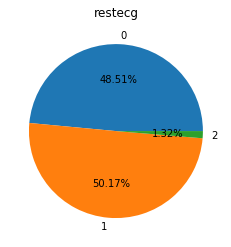

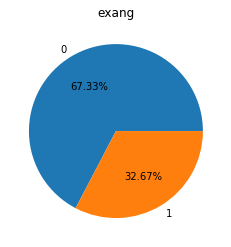

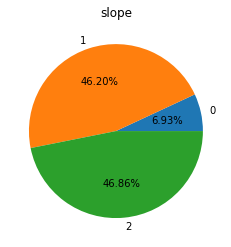

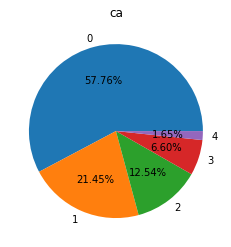

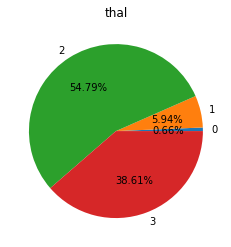

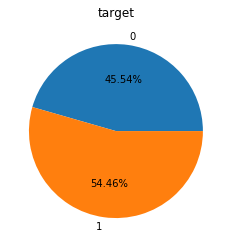

In [4]:
#  Get labels of values greater than zero
def get_new_labels(sizes, labels):
    new_labels = [label if size > 0 else '' for size, label in zip(sizes, labels)]
    return new_labels

# Get percentage values greater than zero
def autopct_generator():
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > 0 else ''
    return inner_autopct

avaliable_columns = ["age", "trestbps", "chol", "thalach", "oldpeak", "sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Draw histograms charts
for i in avaliable_columns[:4]:
    plt.title(i)
    plt.hist(trainx[i])
    plt.show()

# Drawing pie charts
for i in avaliable_columns[4:] + ["target"]:
    temp = [0] * 10
    labels = range(0, 10)
    
    # Add present values
    for j in labels:
        temp[j] = (trainx[i] == j).sum()
        
    plt.title(i)
    plt.pie(temp, labels=get_new_labels(temp, labels), autopct=autopct_generator(),)
    plt.show()

In [5]:
# Get all column exclude "target"
X = trainx[avaliable_columns]

# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, trainx["target"], test_size=0.2, random_state=1) 

In [6]:
#Extracted from https://www.kaggle.com/grfiv4/plot-a-confusion-matrix


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

If the 90% training set increases the accuracy in all methods quite a bit, but this may be because there is a smaller set of tests.

In [7]:
t_dtc = time()

# Create Decision Tree Classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc.fit(X_train,y_train)

# Predict the response for test dataset
y_pred_tree = dtc.predict(X_test)

# Execution time 
print("Execution time:", round(time()-t_dtc, 3), "s")

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))

Execution time: 0.006 s
Accuracy: 0.7540983606557377


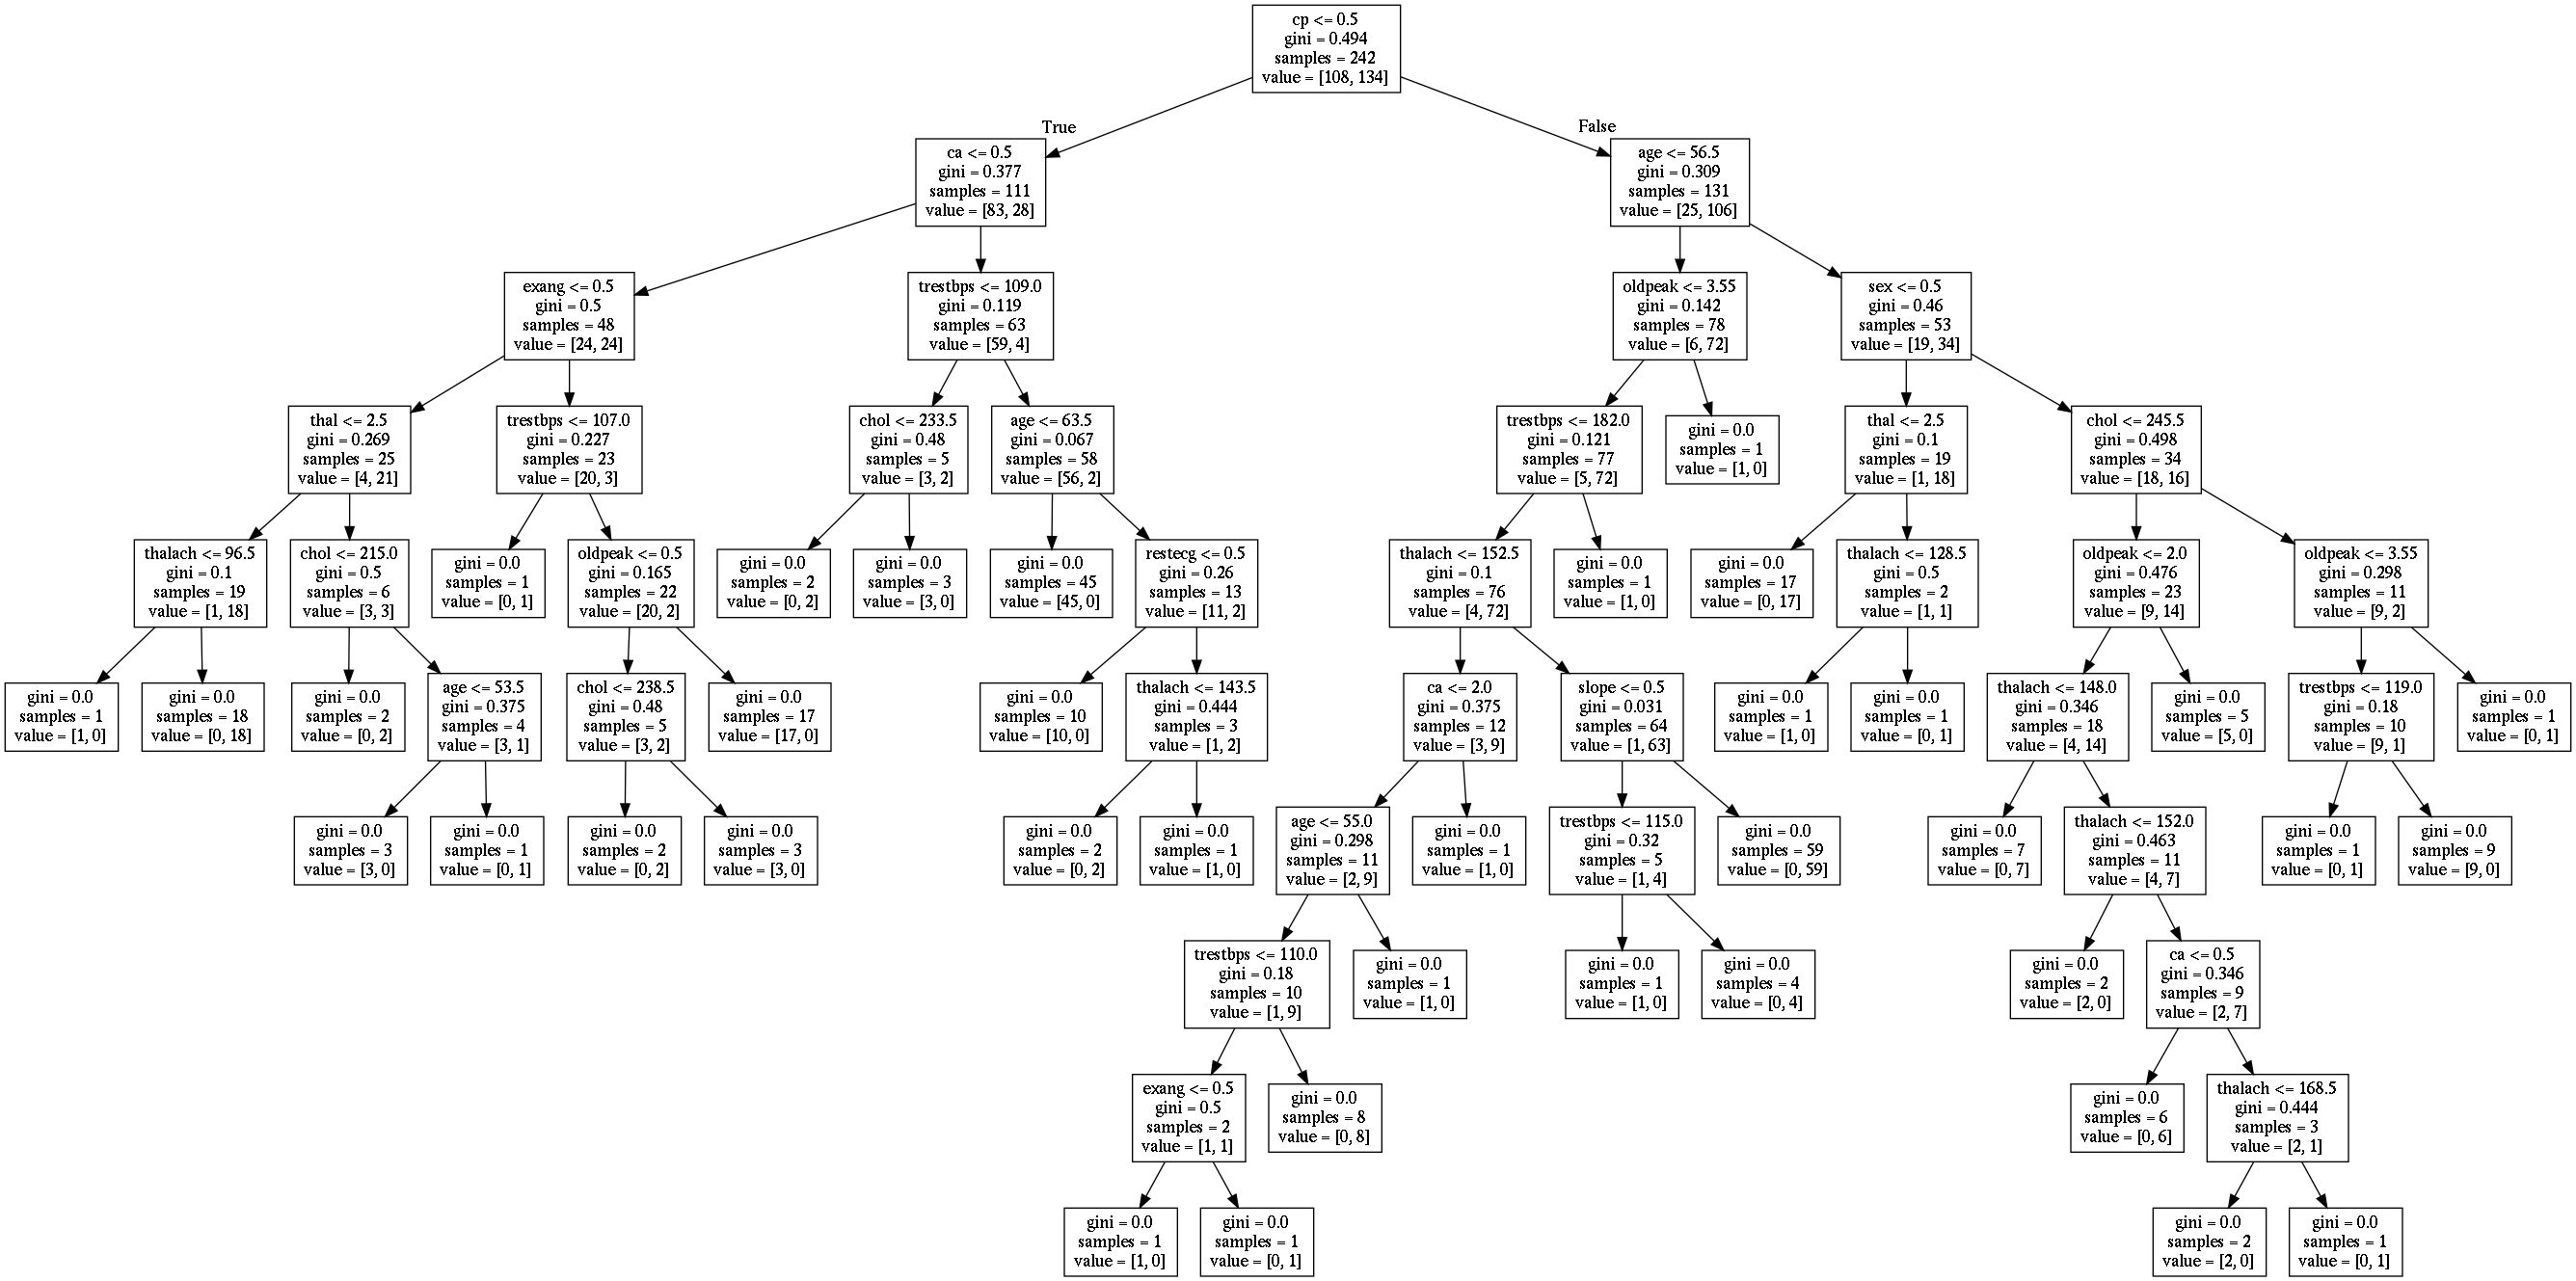

In [8]:
# Create DOT data
dot_data = StringIO()  
tree.export_graphviz(dtc, out_file=dot_data, feature_names=avaliable_columns)

# Draw graph
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

# Show graph
Image(graph.create_png()) 

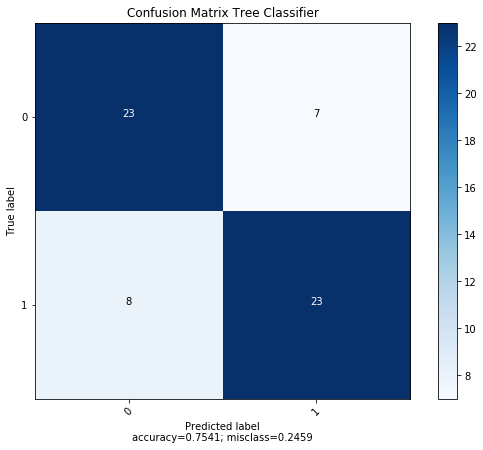

In [9]:
#confusion Matrix for Tree-Decision Classifier
cm=metrics.confusion_matrix(y_test, y_pred_tree)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = [0, 1],
                      title        = "Confusion Matrix Tree Classifier")

In [10]:
# Precision for Tree-Decision Classifier
metrics.precision_score(y_test, y_pred_tree)

0.7666666666666667

Decision Tree

A very fast algorithm but with the lowest and most variable accuracy of all methods.

In [11]:
t_gnb = time()

# Create a Gaussian Naive Bayes object
gnb = GaussianNB()

# Train Gaussian Naive Bayes
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_gauss = gnb.predict(X_test)

# Execution time 
print("Execution time:", round(time()-t_gnb, 3), "s")

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gauss))

Execution time: 0.006 s
Accuracy: 0.7704918032786885


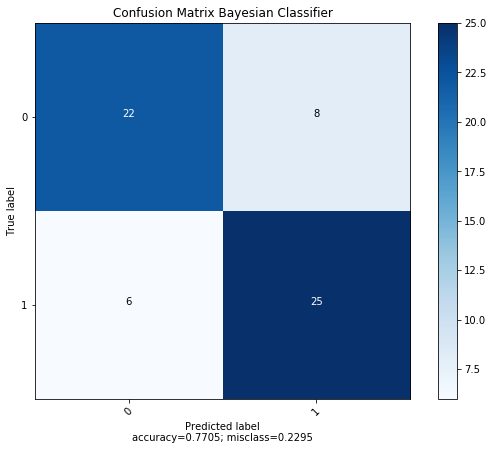

In [12]:
#confusion matrix for Bayesian classifier
cm=metrics.confusion_matrix(y_test,y_pred_gauss)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = [0, 1],
                      title        = "Confusion Matrix Bayesian Classifier")

In [13]:
# Precision for Gaussian Naive Bayes
metrics.precision_score(y_test, y_pred_gauss)

0.7575757575757576

Gaussian Naive Bayes

A very fast algorithm obtains a good precision.

In [14]:
t_mlpc = time()

# Create a Neural Network object using lbfgs solver
mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(128,128,128), random_state=1)

# Train Neural Network
mlpc.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_neural = mlpc.predict(X_test)

# Execution time 
print("Execution time:", round(time()-t_mlpc, 3), "s")

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_neural))

Execution time: 1.612 s
Accuracy: 0.7704918032786885


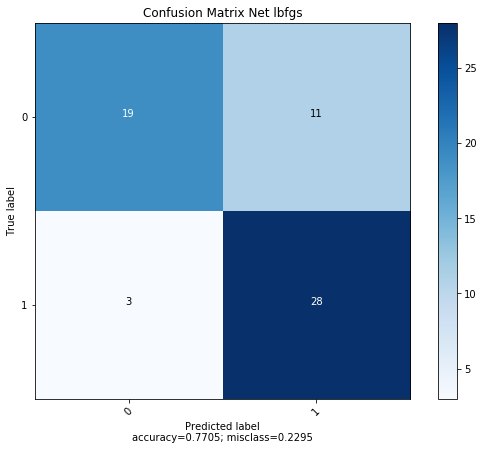

In [15]:
#confusion Matrix of neural network using lbfgs solver
cm=metrics.confusion_matrix(y_test,y_pred_neural)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = [0, 1],
                      title        = "Confusion Matrix Net lbfgs")

In [16]:
# Precision for neural network using lbfgs solver
metrics.precision_score(y_test, y_pred_neural)

0.717948717948718

In [17]:
t_sgf = time()

# Create a Neural Network object using sgd solver
mlpc_sgf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(128,128,128), random_state=1)

# Train Neural Network
mlpc_sgf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_neural_sgf = mlpc_sgf.predict(X_test)

# Execution time 
print("Execution time:", round(time()-t_sgf, 3), "s")

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_neural_sgf))

Execution time: 0.366 s
Accuracy: 0.5901639344262295


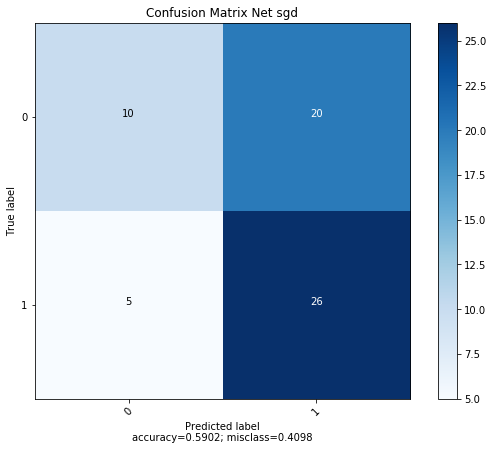

In [18]:
#confusion Matrix of neural network using sgd solver
cm=metrics.confusion_matrix(y_test,y_pred_neural_sgf)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = [0, 1],
                      title        = "Confusion Matrix Net sgd")

In [19]:
# Precision for neural network using sgd solver
metrics.precision_score(y_test, y_pred_neural_sgf)

0.5652173913043478

In [20]:
t_adam = time()

# Create a Neural Network object using adam solver
mlpc_adam = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(128,128,128), random_state=1)

# Train Neural Network
mlpc_adam.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_neural_adam = mlpc_adam.predict(X_test)

# Execution time 
print("Execution time:", round(time()-t_adam, 3), "s")

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_neural_adam))

Execution time: 1.068 s
Accuracy: 0.7540983606557377


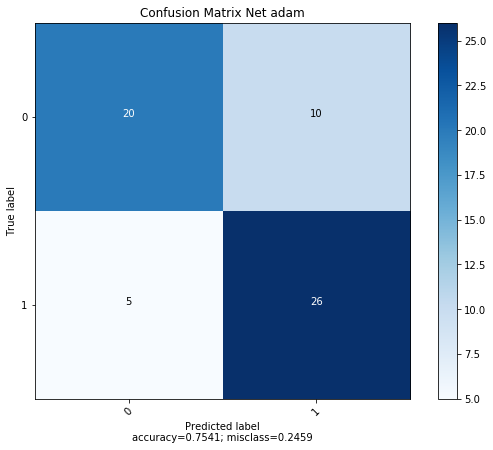

In [21]:
#confusion Matrix of neural network using adam solver
cm=metrics.confusion_matrix(y_test,y_pred_neural_adam)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = [0, 1],
                      title        = "Confusion Matrix Net adam")

In [22]:
# Precision for neural network using adam solver
metrics.precision_score(y_test, y_pred_neural_adam)

0.7222222222222222

Neural Network

A slow algorithm obtains a good precision.

The solver for weight optimization.

* ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
* ‘sgd’ refers to stochastic gradient descent.
* ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

Of all the available solvers, the one with the best accuracy was "lbfgs".

We think that we obtained results so similar to the previous ones due to the small size of the data set.

You get the same score as above, but this may be because the data set is very small.

I would probably use a neural network with the lbfgs solver, since the network shows greater pressure along with stability, perhaps its only weak point is the difficulty in interpreting this model.

Conclusions:

* Because neural network algorithms take a long time to get good accuracy, the best algorithm is Naive Bayes.
* Due to its low precision the decision tree algorithm is not worth it.
* The solver with the best accuracy is lbfgs
* Naive bayes obtains the best accuracy in the low execution time.